In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os

import numpy as np

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import _pickle as cPickle
import json

sys.path.insert(1, '/home/kbrennan/cell_tracker/')
from cell_tracker import Cell, filter_cells_lifespan, remove_dublicate_cells

sys.path.insert(1, '/home/kbrennan/phd/scripts')

import plotting.plot_utils as pu
pu.figure_setup()

In [2]:
root = '/home/kbrennan/phd/data/case_20210628/tracks_new'
member = '000'

path_json = os.path.join(root, f'cell_tracks_{member}.json')
path_pickle = os.path.join(root, f'cells_{member}.pickle')

with open(path_json, 'r') as f:
    data_j = json.load(f)

with open(path_pickle, 'rb') as f:
    cells = cPickle.load(f)

cells_j = data_j['cell_data']

In [3]:
for cell in cells:
    cell.append_associates(cells)

In [4]:
longlived = filter_cells_lifespan(cells, 2.5*60)

In [5]:
for cell in longlived:
    cell.append_associates(cells)

In [6]:
len(longlived)

20

In [7]:
filtered = remove_dublicate_cells(longlived)

In [8]:
len(filtered)

8

(394.0011560693642, 1009.9757225433526, 387.48609505459217, 741.8290408906016)

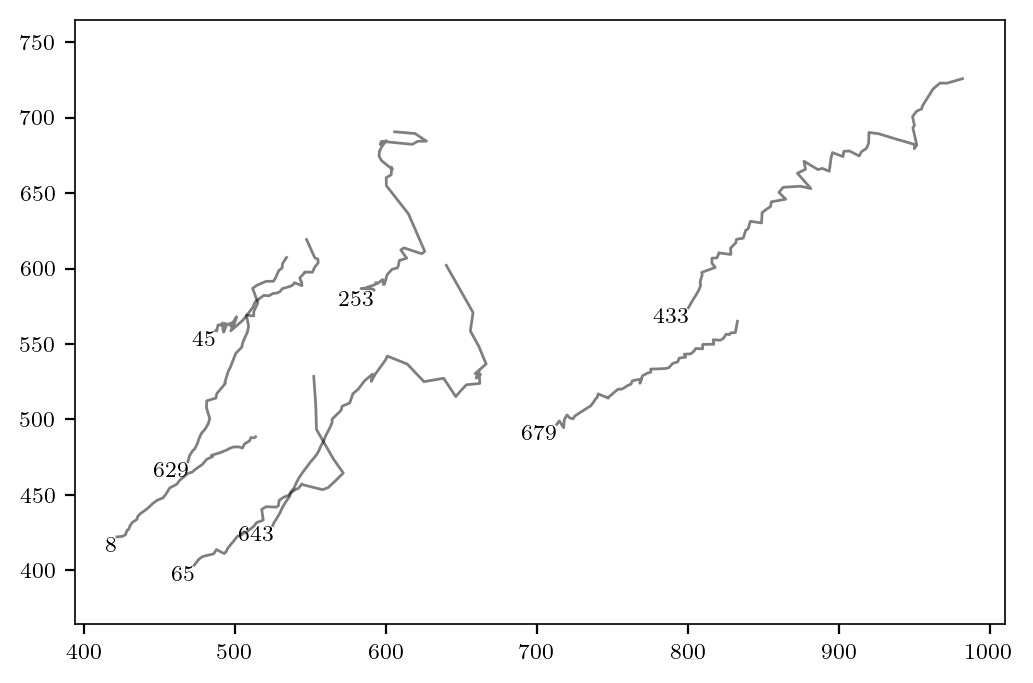

In [9]:
for cell in filtered:
    if cell.cell_id == 962: # 000,51  004,962  
        color = 'r'
    else:
        color = 'k'
    plt.plot(cell.mass_center_y, cell.mass_center_x, color, alpha=0.5)
    plt.text(cell.mass_center_y[0], cell.mass_center_x[0], cell.cell_id, horizontalalignment='right', verticalalignment='top', fontsize=8)

# equal aspect ratio
plt.axis('equal')

In [10]:
len(cells)

859

In [11]:
np.mean([len(cell.mass_center_x) for cell in cells])

8.21071012805588

(531.1440329218108, 571.1440329218108)

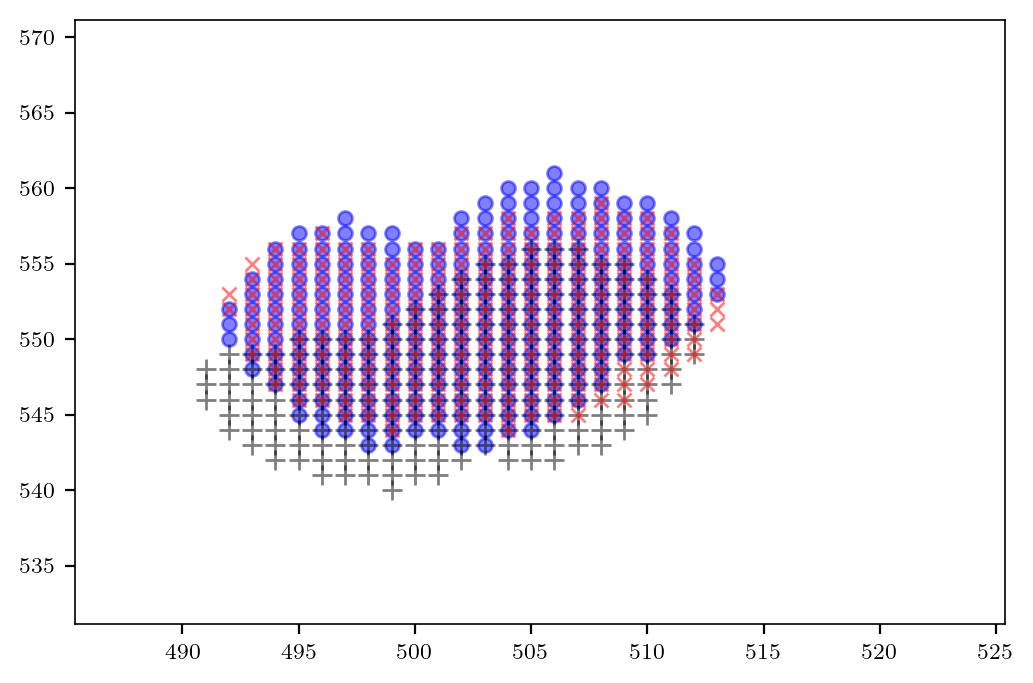

In [19]:
cell = filtered[7]
pad = 20
t = 22
plt.plot(cell.search_field[t-1][:,1], cell.search_field[t-1][:,0], 'bo', alpha=0.5, markersize=5)
plt.plot(cell.field[t-1][:,1], cell.field[t-1][:,0], 'k+', alpha=0.5, markersize=7)
plt.plot(cell.field[t][:,1], cell.field[t][:,0], 'rx', alpha=0.5, markersize=5)
plt.xlim(cell.mass_center_y[t]-pad, cell.mass_center_y[t]+pad)
plt.ylim(cell.mass_center_x[t]-pad, cell.mass_center_x[t]+pad)

In [13]:
cell.datelist[10]

numpy.datetime64('2021-06-29T08:40:00.000000000')

In [14]:
for i,cell in enumerate(filtered):
    print(i,cell.cell_id)

0 433
1 679
2 643
3 45
4 65
5 8
6 253
7 629
